# Unit 5 - Financial Planning

In [209]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [210]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [211]:
# Set current amount of crypto assets

my_btc = 1.2

my_eth = 5.3

In [212]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [213]:
# Fetch current BTC price ()
response = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD")

btc_response_json = response.json()
btc_response_json
btc_response_json['data']['1']['quotes']['USD']['price']
btc_price = btc_response_json['data']['1']['quotes']['USD']['price']


# Compute current value of my crpto


# Print current crypto wallet balance
#print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
#print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

In [214]:

# Fetch current ETH price
eth_response = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=USD")
eth_response_json = eth_response.json()
eth_response_json['data']['1027']['quotes']['USD']['price']
eth_price = eth_response_json['data']['1027']['quotes']['USD']['price']




Fetch current BTC price

In [215]:
btc_price 

39468.0

Fetch current ETH price

In [216]:
eth_price 

2946.3

Compute current value of my crpto

In [217]:
# Compute current value of my crpto
btc_price * my_btc 

47361.6

In [218]:
eth_price * my_eth 

15615.390000000001

In [219]:
#print(f"The current value of your {my_btc} BTC is ${btc_price}")

In [220]:
#print(f"The current value of your {my_eth} ETH is ${eth_price:0.2f}")

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [221]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [222]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# This is the SDK
api_key = os.getenv("ALPACA_API_KEY")
api_s_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
api_key,
api_s_key,
api_version = "v2"
)

In [223]:
#Format current date as ISO format
#from datetime import datetime
#today = pd.datetime.now().isoformat()
today = pd.Timestamp("2022-04-22", tz="America/New_York").isoformat()


In [224]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
       tickers,
       timeframe,
       start = today,
       end = today             
).df

# Reorganize the DataFrame

df_portfolio.index = df_portfolio.index.date

#Example code api.get_bars("AGG", timeframe, "2021-06-08", "2021-06-08", adjustment='raw').df
df_portfolio


,open,high,low,close,volume,trade_count,vwap,symbol
2022-04-22,102.73,103.1800,102.67,102.94,9152665,31498,102.925863,AGG
2022-04-22,436.94,438.0825,425.44,426.04,132156403,972064,429.813156,SPY


In [225]:


# Separate ticker data

AGG = df_portfolio [df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio [df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)






In [226]:
AGG

,open,high,low,close,volume,trade_count,vwap
2022-04-22,102.73,103.18,102.67,102.94,9152665,31498,102.925863


In [227]:
SPY

,open,high,low,close,volume,trade_count,vwap
2022-04-22,436.94,438.0825,425.44,426.04,132156403,972064,429.813156


In [228]:
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])
# Preview DataFrame
df_portfolio

AGG                                                           \
              open    high     low   close   volume trade_count        vwap   
2022-04-22  102.73  103.18  102.67  102.94  9152665       31498  102.925863   

               SPY                                                   \
              open      high     low   close     volume trade_count   
2022-04-22  436.94  438.0825  425.44  426.04  132156403      972064   

                        
                  vwap  
2022-04-22  429.813156

In [229]:
# Pick AGG and SPY close prices
#Print Closing Prices 
AGG_close_price = df_portfolio['AGG']['close'][0]  
AGG_close_price 




102.94

In [230]:
SPY_close_price = df_portfolio['SPY']['close'][0] 
SPY_close_price

426.04

In [231]:
# Compute the current value of shares

print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")




Current AGG closing price: $102.94
Current SPY closing price: $426.04


In [235]:
my_agg_value = AGG_close_price * my_agg
my_spy_value = SPY_close_price * my_spy

In [236]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21302.00
The current value of your 200 AGG shares is $20588.00


### Savings Health Analysis

In [242]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data


investment_type = ["Crypto ", "Shares "]

# Create savings DataFrame
df_savings  = pd.DataFrame(index=[investment_type])
df_savings['amount'] = [Crypto, Shares]

# Display savings DataFrame
df_savings

,amount
Crypto,19385.986877
Shares,406616.500000


<AxesSubplot:ylabel='amount'>

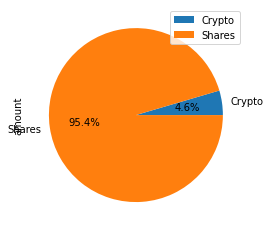

In [243]:
# Plot savings pie chart
labels = 'Crypto', 'Shares'
df_savings.plot.pie(y='amount',subplots=False, autopct='%1.1f%%',labels=labels)

In [245]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"][0] + df_savings["amount"][1]

# Validate saving health
total_savings

# YOUR CODE HERE!


426002.486877

In [248]:
if total_savings > emergency_fund:
    print(f"you have emergency money")

elif total_savings < emergency_fund:
  print(f"you have work to do")



you have emergency money


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")